<a href="https://colab.research.google.com/github/srujayreddyv/AlphaML/blob/main/labs/2LinearRegressorOnDiabetesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

##Dataset

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
print(dataset)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

##Simple Linear Regressor: X_1 to Y

In [5]:
x = dataset['data'][..., 0:1]
y = dataset['target']

Text(0, 0.5, 'Diabetes Progression')

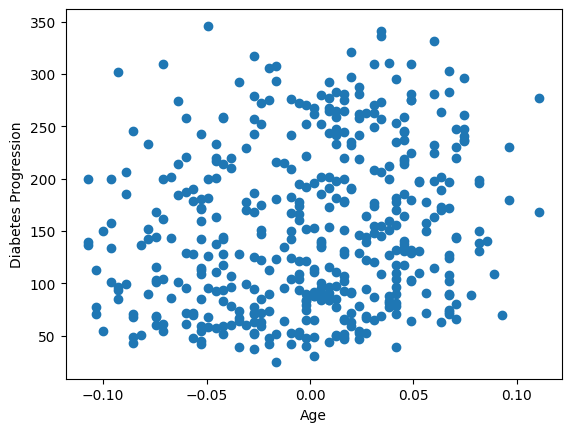

In [6]:
plt.scatter(x[..., 0], y)
plt.xlabel('Age')
plt.ylabel('Diabetes Progression')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
print(x_train.shape, x_test.shape)

(353, 1) (89, 1)


In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'Diabetes Progression')

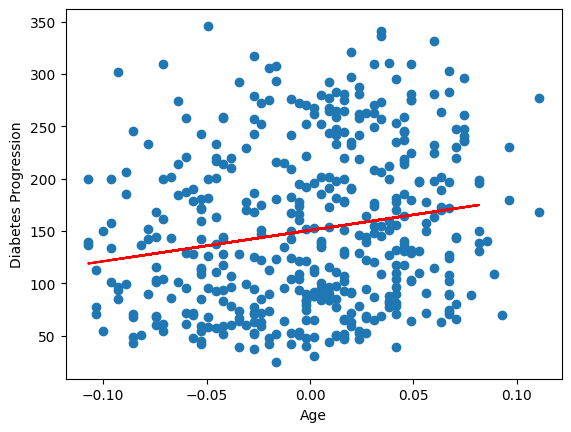

In [12]:
plt.scatter(x[..., 0], y)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Diabetes Progression')

In [13]:
# y = wx + b

w = model.coef_
b = model.intercept_
print(w, b)

[296.24390117] 150.76621408479912


In [14]:
print(y_pred[0], w*x_test[0] + b)

150.2086781665372 [150.20867817]


In [15]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.042994857342614656 4943.2177813914805


##Multi-Linear Regression

In [16]:
x = dataset['data']
y = dataset['target']

In [17]:
print(x.shape)

(442, 10)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [20]:
w = model.coef_
b = model.intercept_
print(w, b)

[ -36.24416338 -235.51795059  542.66443587  319.1838992  -773.08345039
  477.28407907   92.09539669  185.57384794  746.03163325   35.78269935] 150.54187728613562


In [21]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5884178262268402 2411.928175675874
